In [22]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [23]:
# Carregamento dos dados
df = pd.read_csv('Obesity.csv')

print("=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Shape do dataset: {df.shape}")
print(f"\nTipos de dados:")
print(df.dtypes)

print(f"\nPrimeiras 5 linhas:")
print(df.head())

print(f"\nInformações gerais:")
print(df.info())

print(f"\nVerificação de valores nulos:")
print(df.isnull().sum())

print(f"\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe())

=== INFORMAÇÕES BÁSICAS DO DATASET ===
Shape do dataset: (2111, 17)

Tipos de dados:
Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

Primeiras 5 linhas:
   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no  

In [24]:
# ===========================================
# ANÁLISE EXPLORATÓRIA DOS DADOS
# ===========================================

print("\n" + "="*50)
print("📊 ANÁLISE EXPLORATÓRIA DOS DADOS")
print("="*50)

# Análise das variáveis categóricas
categorical_cols = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

print("\n--- DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS ---")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Verificar categorias únicas para cada variável categórica
print(f"\n--- CATEGORIAS ÚNICAS ---")
print(f"Categorias CAEC: {df['CAEC'].unique()}")
print(f"Categorias CALC: {df['CALC'].unique()}")
print(f"Categorias MTRANS: {df['MTRANS'].unique()}")
print(f"Categorias Gender: {df['Gender'].unique()}")
print(f"Categorias family_history: {df['family_history'].unique()}")


📊 ANÁLISE EXPLORATÓRIA DOS DADOS

--- DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS ---

Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history:
family_history
yes    1726
no      385
Name: count, dtype: int64

FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC:
SCC
no     2015
yes      96
Name: count, dtype: int64

CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

--- CATEGORIAS ÚNICAS ---
Categorias CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Categorias CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Categorias MTRA


🎯 ANÁLISE DA VARIÁVEL TARGET (OBESITY)

Distribuição das classes de Obesidade:
Obesity
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
Name: count, dtype: int64

Percentual de cada classe:
Insufficient_Weight: 12.9%
Normal_Weight: 13.6%
Obesity_Type_I: 16.6%
Obesity_Type_II: 14.1%
Obesity_Type_III: 15.3%
Overweight_Level_I: 13.7%
Overweight_Level_II: 13.7%


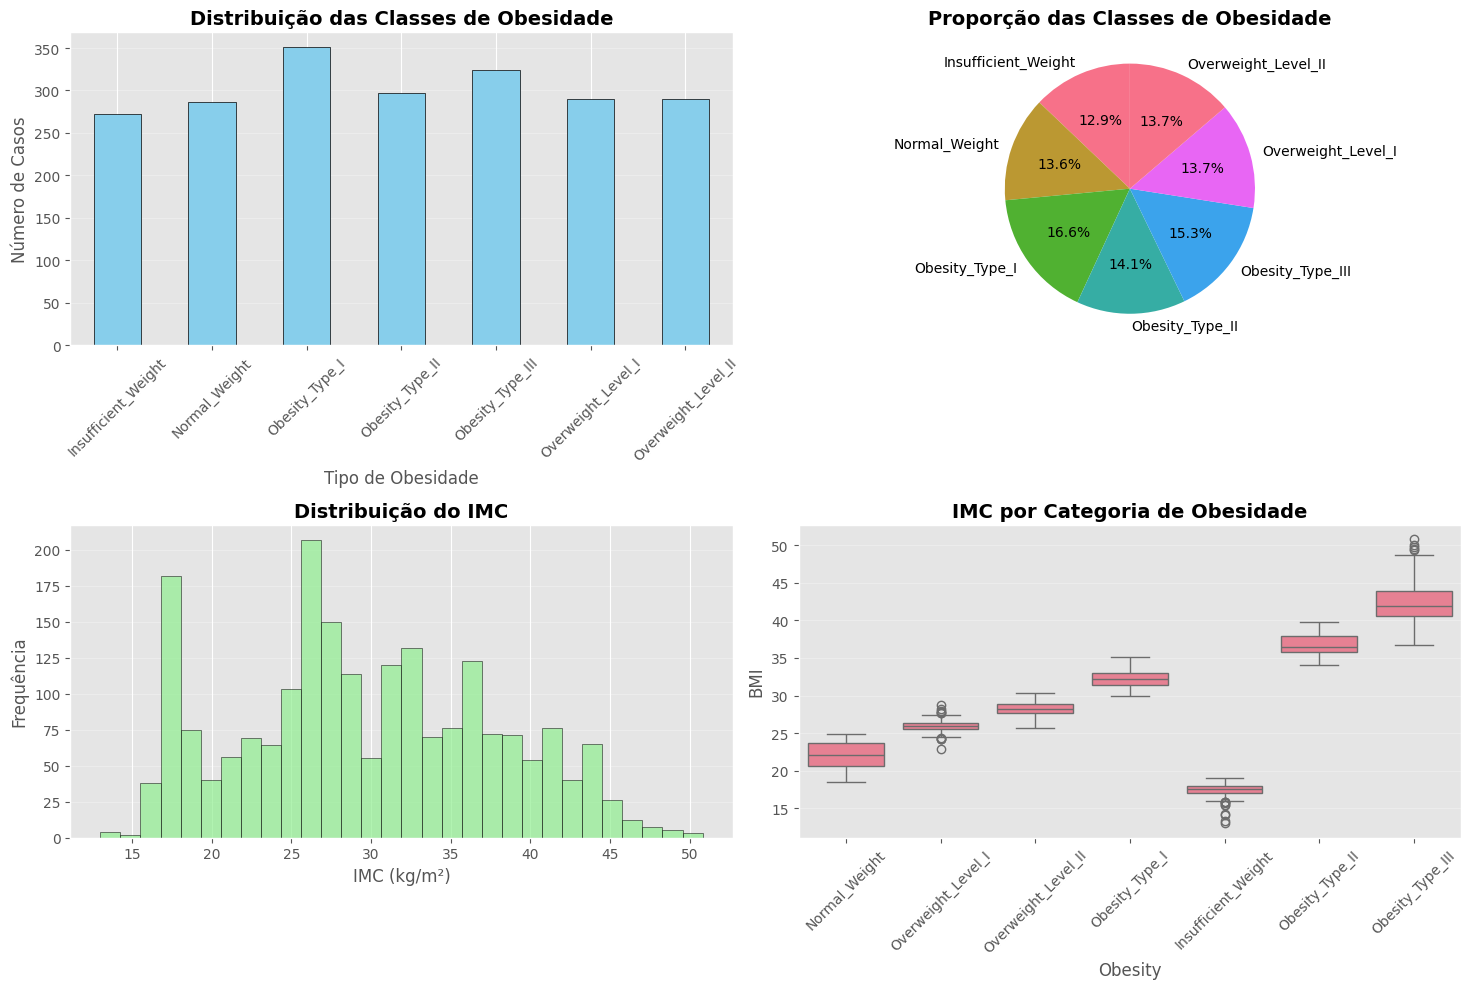


--- CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS ---


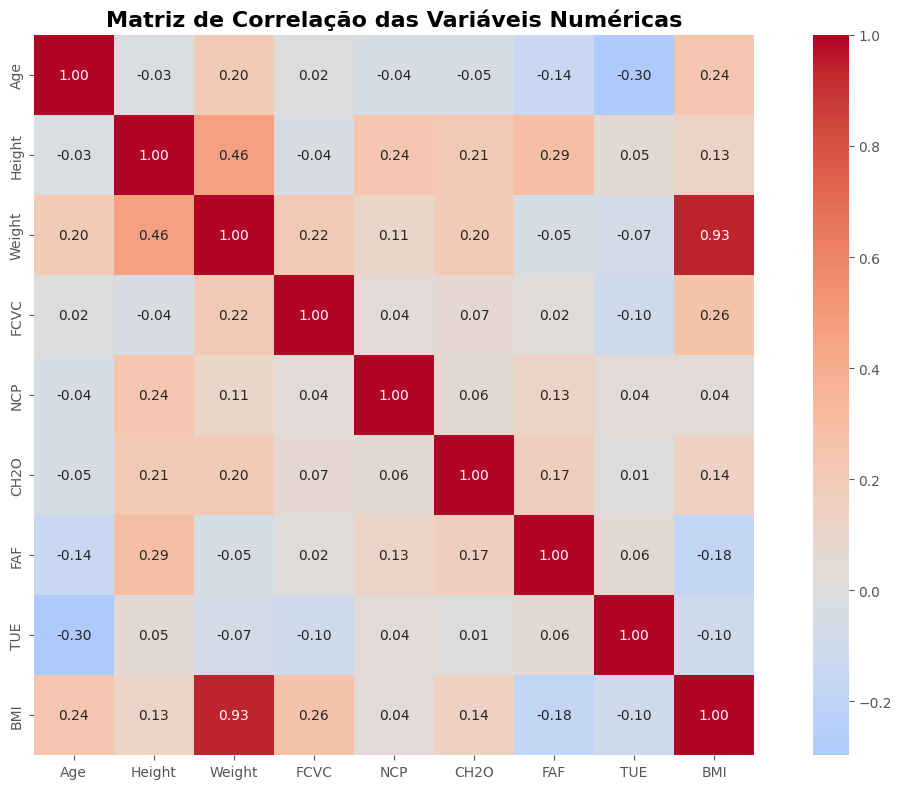

In [25]:
# ===========================================
# ANÁLISE DO TARGET (OBESITY)
# ===========================================

print("\n" + "="*50)
print("🎯 ANÁLISE DA VARIÁVEL TARGET (OBESITY)")
print("="*50)

print(f"\nDistribuição das classes de Obesidade:")
target_counts = df['Obesity'].value_counts().sort_index()
print(target_counts)

print(f"\nPercentual de cada classe:")
target_percentages = df['Obesity'].value_counts(normalize=True).sort_index() * 100
for class_name, percentage in target_percentages.items():
    print(f"{class_name}: {percentage:.1f}%")

# Visualização da distribuição do target
plt.figure(figsize=(15, 10))

# Gráfico 1: Contagem das classes
plt.subplot(2, 2, 1)
target_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição das Classes de Obesidade', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Obesidade')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Gráfico 2: Gráfico de pizza
plt.subplot(2, 2, 2)
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção das Classes de Obesidade', fontsize=14, fontweight='bold')
plt.ylabel('')

# Gráfico 3: Distribuição de IMC
plt.subplot(2, 2, 3)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
plt.hist(df['BMI'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribuição do IMC', fontsize=14, fontweight='bold')
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.3)

# Gráfico 4: Boxplot de IMC por classe de obesidade
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Obesity', y='BMI')
plt.title('IMC por Categoria de Obesidade', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Análise de correlações das variáveis numéricas
print(f"\n--- CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS ---")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
# ===========================================
# PREPROCESSAMENTO
# ===========================================

print("\n" + "="*50)
print("🔧 PREPROCESSAMENTO DOS DADOS")
print("="*50)

def preprocess_data_complete(df_input):
    """Preprocessa mantendo TODAS as categorias de forma consistente"""
    df = df_input.copy()

    # Separar variável target
    if 'Obesity' in df.columns:
        X = df.drop('Obesity', axis=1)
        y = df['Obesity']
    else:
        X = df
        y = None

    # Mapeamentos binários
    binary_mappings = {
        'Gender': {'Female': 0, 'Male': 1},
        'family_history': {'no': 0, 'yes': 1},
        'FAVC': {'no': 0, 'yes': 1},
        'SMOKE': {'no': 0, 'yes': 1},
        'SCC': {'no': 0, 'yes': 1}
    }

    # Aplicar mapeamentos binários
    for col, mapping in binary_mappings.items():
        if col in X.columns:
            X[col] = X[col].map(mapping)

    # Criar dummies para variáveis categóricas - MANTENDO TODAS AS CATEGORIAS
    caec_dummies = pd.get_dummies(X['CAEC'], prefix='CAEC')
    calc_dummies = pd.get_dummies(X['CALC'], prefix='CALC')
    mtrans_dummies = pd.get_dummies(X['MTRANS'], prefix='MTRANS')

    # Remover colunas categóricas originais
    X_processed = X.drop(['CAEC', 'CALC', 'MTRANS'], axis=1)

    # Concatenar dummies
    X_final = pd.concat([X_processed, caec_dummies, calc_dummies, mtrans_dummies], axis=1)

    # Garantir ordem consistente das colunas
    expected_order = [
        # Variáveis numéricas/binárias
        'Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC',
        'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE'
    ]

    # Adicionar colunas dummy em ordem alfabética
    caec_cols = sorted([col for col in X_final.columns if col.startswith('CAEC_')])
    calc_cols = sorted([col for col in X_final.columns if col.startswith('CALC_')])
    mtrans_cols = sorted([col for col in X_final.columns if col.startswith('MTRANS_')])

    final_order = expected_order + caec_cols + calc_cols + mtrans_cols

    # Reordenar colunas
    X_final = X_final[final_order]

    if y is not None:
        return X_final, y
    else:
        return X_final

# Preprocessar dados
X, y = preprocess_data_complete(df)

print(f"\n=== RESULTADO DO PREPROCESSAMENTO ===")
print(f"Shape das features: {X.shape}")
print(f"Número de features: {len(X.columns)}")
print(f"Features: {list(X.columns)}")


🔧 PREPROCESSAMENTO DOS DADOS

=== RESULTADO DO PREPROCESSAMENTO ===
Shape das features: (2111, 26)
Número de features: 26
Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [27]:
# ===========================================
# DIVISÃO DOS DADOS E TREINAMENTO DO MODELO
# ===========================================

print("\n" + "="*50)
print("🤖 TREINAMENTO DO MODELO")
print("="*50)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# CRIAR E SALVAR O LABEL ENCODER
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"\n=== MAPEAMENTO DAS CLASSES ===")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")

# Treinar modelo
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


print(f"\nTreinando Gradient Boosting Classifier...")
gb_model.fit(X_train, y_train_encoded)


🤖 TREINAMENTO DO MODELO
Tamanho do conjunto de treino: (1688, 26)
Tamanho do conjunto de teste: (423, 26)

=== MAPEAMENTO DAS CLASSES ===
0: Insufficient_Weight
1: Normal_Weight
2: Obesity_Type_I
3: Obesity_Type_II
4: Obesity_Type_III
5: Overweight_Level_I
6: Overweight_Level_II

Treinando Gradient Boosting Classifier...


GradientBoostingClassifier(max_depth=6, random_state=42)

In [28]:
# ===========================================
# AVALIAÇÃO DO MODELO
# ===========================================

print("\n" + "="*50)
print("📈 AVALIAÇÃO DO MODELO")
print("="*50)

# Fazer predições
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"=== PERFORMANCE DO MODELO ===")
print(f"Acurácia: {accuracy:.4f} ({accuracy*100:.1f}%)")

print(f"\n=== RELATÓRIO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test_encoded, y_pred,
                          target_names=label_encoder.classes_))


📈 AVALIAÇÃO DO MODELO
=== PERFORMANCE DO MODELO ===
Acurácia: 0.9480 (94.8%)

=== RELATÓRIO DE CLASSIFICAÇÃO ===
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.89      0.94        54
      Normal_Weight       0.80      0.95      0.87        58
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       0.97      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.90      0.91        58
Overweight_Level_II       0.97      0.97      0.97        58

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423




=== MATRIZ DE CONFUSÃO ===
Matriz de Confusão (valores absolutos):
[[48  6  0  0  0  0  0]
 [ 0 55  0  0  0  3  0]
 [ 0  0 67  1  0  1  1]
 [ 0  1  0 59  0  0  0]
 [ 0  1  0  0 64  0  0]
 [ 0  5  0  0  0 52  1]
 [ 0  1  0  1  0  0 56]]


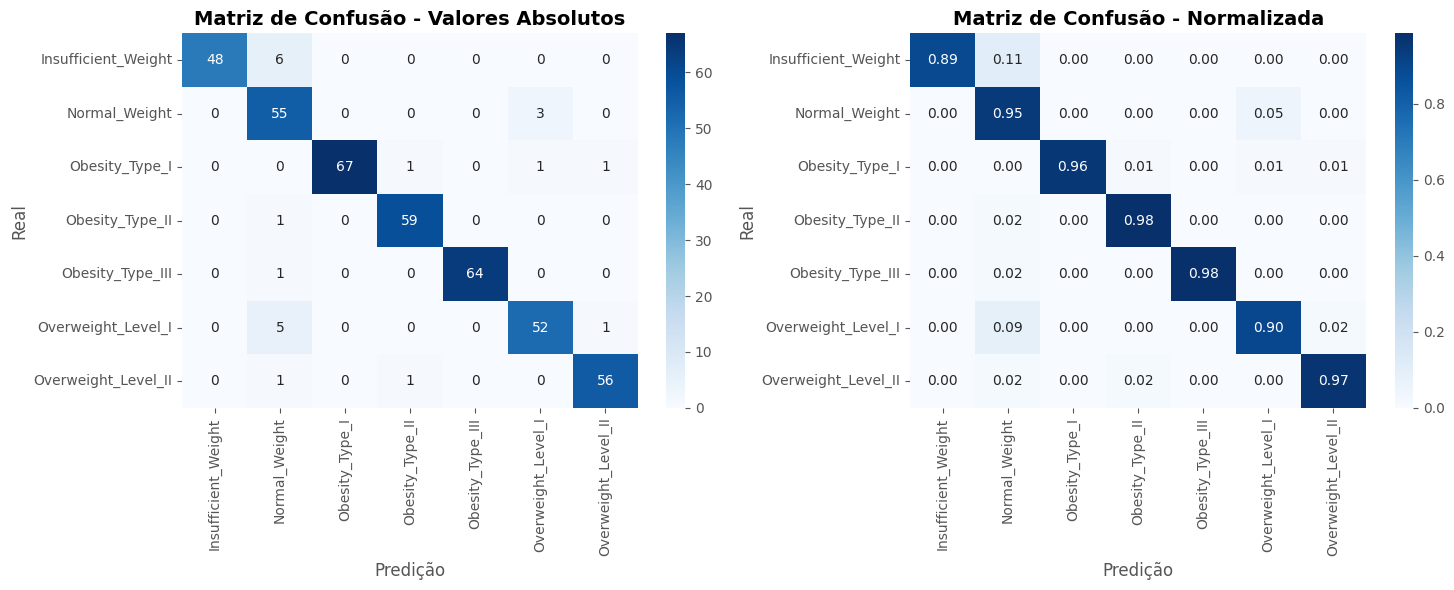

In [29]:
# ===========================================
# MATRIZ DE CONFUSÃO
# ===========================================

print(f"\n=== MATRIZ DE CONFUSÃO ===")

# Calcular matriz de confusão
cm = confusion_matrix(y_test_encoded, y_pred)
print("Matriz de Confusão (valores absolutos):")
print(cm)

# Visualizar matriz de confusão
plt.figure(figsize=(15, 6))

# Matriz de confusão com valores absolutos
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Valores Absolutos', fontsize=14, fontweight='bold')
plt.xlabel('Predição')
plt.ylabel('Real')

# Matriz de confusão normalizada
cm_normalized = confusion_matrix(y_test_encoded, y_pred, normalize='true')
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Normalizada', fontsize=14, fontweight='bold')
plt.xlabel('Predição')
plt.ylabel('Real')

plt.tight_layout()
plt.show()


=== IMPORTÂNCIA DAS FEATURES ===
Top 10 Features mais importantes:
           feature  importance
3           Weight    0.495158
2           Height    0.175484
6             FCVC    0.088412
0           Gender    0.069369
1              Age    0.043517
9             CH2O    0.028078
20         CALC_no    0.019925
11             FAF    0.018460
7              NCP    0.015016
19  CALC_Sometimes    0.010758


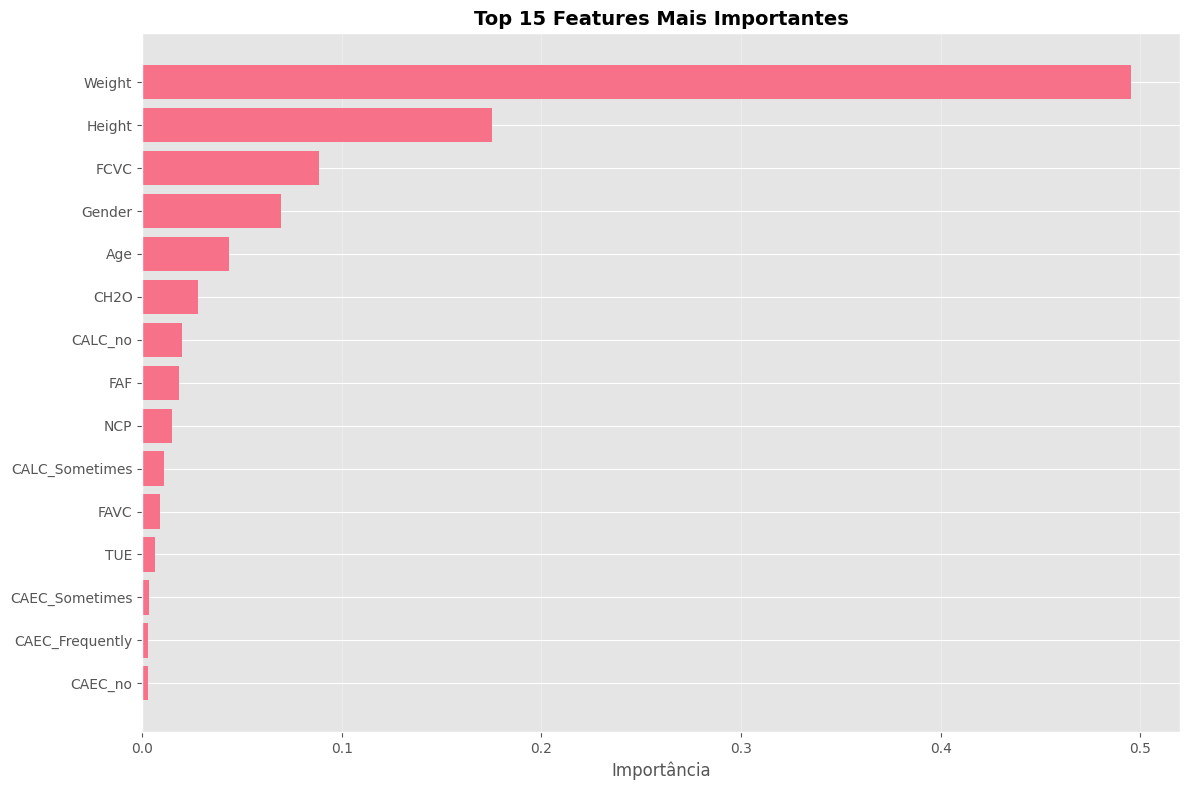

In [30]:
# ===========================================
# IMPORTÂNCIA DAS FEATURES
# ===========================================

print(f"\n=== IMPORTÂNCIA DAS FEATURES ===")

# Calcular importância das features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Features mais importantes:")
print(feature_importance.head(10))

# Visualizar importância das features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importância')
plt.title('Top 15 Features Mais Importantes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:

# ===========================================
# SALVAR MODELO E ENCODERS
# ===========================================

print(f"\n=== SALVANDO ARQUIVOS ===")

joblib.dump(gb_model, 'gb_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')
joblib.dump(X.columns.tolist(), 'feature_names.joblib')

print("✅ gb_model.joblib - Modelo treinado")
print("✅ label_encoder.joblib - Encoder das classes")
print("✅ feature_names.joblib - Nomes das features")
print(f"\nTotal de features salvas: {len(X.columns)}")

print(f"\n" + "="*50)
print("🎉 ANÁLISE COMPLETA FINALIZADA!")
print("="*50)
print(f"📊 Dataset analisado: {df.shape[0]} registros, {df.shape[1]} variáveis")
print(f"🎯 Classes balanceadas: {len(df['Obesity'].unique())} categorias")
print(f"🤖 Modelo treinado: Gradient Boosting (26 features)")
print(f"📈 Acurácia final: {accuracy:.1%}")
print(f"💾 Arquivos salvos com sucesso!")



=== SALVANDO ARQUIVOS ===
✅ gb_model.joblib - Modelo treinado
✅ label_encoder.joblib - Encoder das classes
✅ feature_names.joblib - Nomes das features

Total de features salvas: 26

🎉 ANÁLISE COMPLETA FINALIZADA!
📊 Dataset analisado: 2111 registros, 18 variáveis
🎯 Classes balanceadas: 7 categorias
🤖 Modelo treinado: Gradient Boosting (26 features)
📈 Acurácia final: 94.8%
💾 Arquivos salvos com sucesso!
